In [ ]:
import pandas as pd  # Manipulação de dados
from scipy.stats import chi2_contingency  # Teste qui-quadrado
import statsmodels.api as sm  # Modelagem estatística
import numpy as np  # Operações matemáticas


Tratamento de dados:
* Identificar as variáveis que tem um preenchimento acima de 80%, tanto para NaN quanto para a resposta 97.

Pelo metadados:
* 97 - Não sei/Prefiro não responder

In [ ]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
# local do arquivo
Caminho='/content/DATASEN BR 2021 11 VIOLENCIA DOMESTICA - DADOS.csv'

In [ ]:
base_dados = pd.read_csv(Caminho, delimiter=';')
base_dados

,ID,P03,P04,P05,P06,P07,P08_1,P08_2,P08_3,P08_4,...,VD_TRABALHO,VD_RENDA,VD_RELIGIAO,VD_PORTE,POP_regiao_idade,POP_regiao_raca,POP_regiao_edu,POP_regiao_porte,W1,W2
0,1,2,1,2,1,3,1,1,1,1,...,1,1,1,2,"1368769,64997537","3492870,23933838","1676030,32564476","1833026,92610785","0,182984706628559","4822,37879865543"
1,2,2,1,1,1,3,1,1,1,1,...,1,97,3,3,"2087753,60313513","9305147,46687386","3463850,5010793","2283455,46575742","0,426501513466645","7798,59256826784"
2,3,3,1,2,1,3,1,1,1,1,...,1,97,2,2,"1204952,8842969","4928294,52172805","2004551,18531068","2673532,83014303","0,239731863563941","10003,2121465603"
3,4,3,2,1,1,3,1,1,1,1,...,1,4,1,2,"4125873,7903102","5757238,40466733","3969200,1711912","7278733,22970919","0,580278168423321","12536,3215219058"
4,5,2,1,2,1,3,1,1,1,1,...,1,3,3,2,"1204952,8842969","4928294,52172805","2326739,31494048","2673532,83014303","0,179930621055583","5704,56980070413"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,3,2,1,1,4,2,2,2,2,...,99,1,3,2,"950522,51901295","76655,08763464","1676030,32564476","1833026,92610785","0,255743900242304","1336,84465897598"
2996,2997,3,5,2,1,4,2,2,2,2,...,2,3,1,1,"6626582,53147046","217603,89386544","7160066,96219253","9992811,49421768","0,247668454655575","5677,57489054775"
2997,2998,2,3,1,1,3,2,2,2,1,...,1,3,1,3,"1224093,26675412","2324293,07987146","1058552,96885554","2636491,36329934","0,767231700726912","13413,8534177151"
2998,2999,3,1,1,1,3,2,1,1,1,...,1,4,3,3,"1368769,64997537","2324293,07987146","1861753,07705336","2636491,36329934","0,255743900242304","5184,74606390103"


P18_D - Essa violência foi provocada por um homem ou por uma mulher?
* 1 Homem
* 2 Mulher
* 97 Não sei/Prefiro não responder

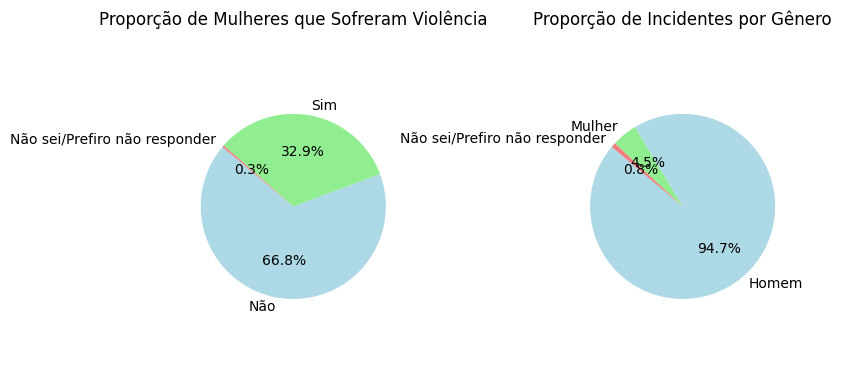

In [ ]:
import matplotlib.pyplot as plt

# Contagem de incidentes por categoria
contagem_por_genero = base_dados['P18_D'].value_counts()
contagem_sofreram = base_dados['P18_A'].value_counts()

# Rótulos para as categorias
labels = ['Homem', 'Mulher', 'Não sei/Prefiro não responder']
labels_2 = ['Não', 'Sim', 'Não sei/Prefiro não responder']

# Cores para as fatias do gráfico
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Configuração dos subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico 1: Proporção de mulheres que sofreram violência
axs[0].pie(contagem_sofreram, labels=labels_2, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Proporção de Mulheres que Sofreram Violência')
axs[0].axis('equal')

# Gráfico 2: Proporção de incidentes por gênero
axs[1].pie(contagem_por_genero, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Proporção de Incidentes por Gênero')
axs[1].axis('equal')

# Ajuste de layout
plt.tight_layout()

# Exibição dos gráficos
plt.show()

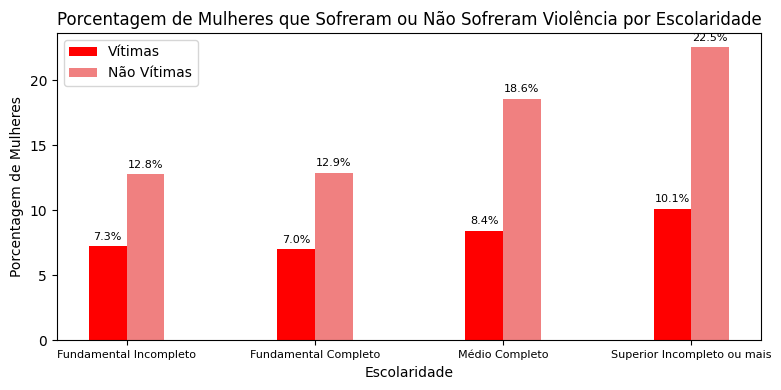

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Total de mulheres no dataset
total_mulheres = len(base_dados)

# Contagem de mulheres que sofreram violência por escolaridade
contagem_vitimas = base_dados[base_dados['P18_A'] == 1]['VD_EDUCACAO'].value_counts().sort_index()

# Contagem de mulheres que não sofreram violência por escolaridade
contagem_nao_vitimas = base_dados[base_dados['P18_A'] == 2]['VD_EDUCACAO'].value_counts().sort_index()

# Converter contagens em percentuais
percentuais_vitimas = (contagem_vitimas / total_mulheres) * 100
percentuais_nao_vitimas = (contagem_nao_vitimas / total_mulheres) * 100

# Rótulos para as categorias de escolaridade
labels = ['Fundamental Incompleto', 'Fundamental Completo', 'Médio Completo', 'Superior Incompleto ou mais']

# Posição das barras no eixo x
x = np.arange(len(labels))

# Largura das barras
width = 0.20

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width/2, percentuais_vitimas, width, label='Vítimas', color='red')
rects2 = ax.bar(x + width/2, percentuais_nao_vitimas, width, label='Não Vítimas', color='lightcoral')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Escolaridade', fontsize=10)
ax.set_ylabel('Porcentagem de Mulheres', fontsize=10)
ax.set_title('Porcentagem de Mulheres que Sofreram ou Não Sofreram Violência por Escolaridade', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=8)
ax.legend()

# Adicionando rótulos nas barras em porcentagem
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

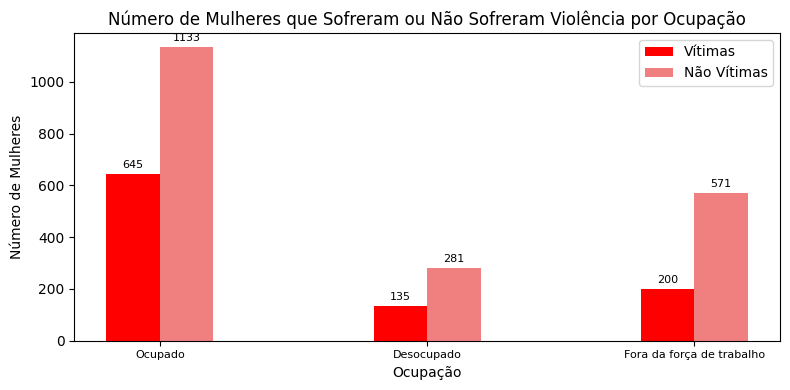

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Contagem de mulheres que sofreram violência por escolaridade
contagem_vitimas = base_dados[base_dados['P18_A'] == 1]['VD_OCUPACAO'].value_counts().sort_index()

# Contagem de mulheres que não sofreram violência por escolaridade
contagem_nao_vitimas = base_dados[base_dados['P18_A'] == 2]['VD_OCUPACAO'].value_counts().sort_index()

# Rótulos para as categorias de escolaridade
labels = ['Ocupado','Desocupado','Fora da força de trabalho']

# Posição das barras no eixo x
x = np.arange(len(labels))

# Largura das barras
width = 0.20

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width/2, contagem_vitimas, width, label='Vítimas', color='red')
rects2 = ax.bar(x + width/2, contagem_nao_vitimas, width, label='Não Vítimas', color='lightcoral')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Ocupação', fontsize=10)
ax.set_ylabel('Número de Mulheres', fontsize=10)
ax.set_title('Número de Mulheres que Sofreram ou Não Sofreram Violência por Ocupação', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=8)
ax.legend()

# Adicionando rótulos nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

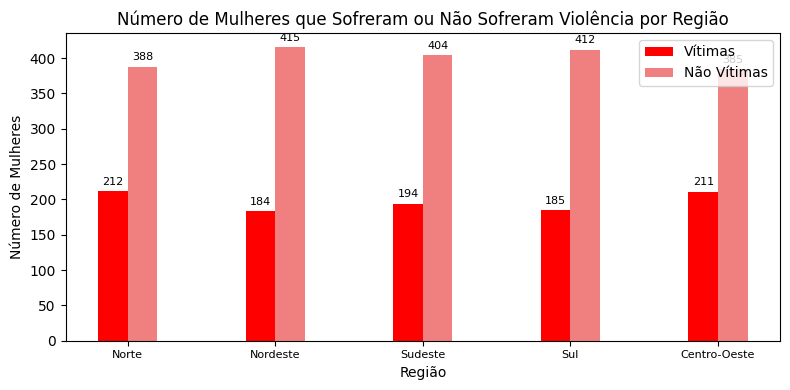

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Contagem de mulheres que sofreram violência por região
contagem_vitimas_regiao = base_dados[base_dados['P18_A'] == 1]['VD_REGIAO'].value_counts().sort_index()

# Contagem de mulheres que não sofreram violência por região
contagem_nao_vitimas_regiao = base_dados[base_dados['P18_A'] == 2]['VD_REGIAO'].value_counts().sort_index()

# Rótulos para as categorias de região
labels_regiao = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

# Posição das barras no eixo x
x_regiao = np.arange(len(labels_regiao))

# Largura das barras
width_regiao = 0.20

# Plot
fig_regiao, ax_regiao = plt.subplots(figsize=(8, 4))
rects1_regiao = ax_regiao.bar(x_regiao - width_regiao/2, contagem_vitimas_regiao, width_regiao, label='Vítimas', color='red')
rects2_regiao = ax_regiao.bar(x_regiao + width_regiao/2, contagem_nao_vitimas_regiao, width_regiao, label='Não Vítimas', color='lightcoral')

# Adicionando rótulos, título e legenda
ax_regiao.set_xlabel('Região', fontsize=10)
ax_regiao.set_ylabel('Número de Mulheres', fontsize=10)
ax_regiao.set_title('Número de Mulheres que Sofreram ou Não Sofreram Violência por Região', fontsize=12)
ax_regiao.set_xticks(x_regiao)
ax_regiao.set_xticklabels(labels_regiao, rotation=0, ha='center', fontsize=8)
ax_regiao.legend()

# Adicionando rótulos nas barras
def autolabel_regiao(rects):
    for rect in rects:
        height = rect.get_height()
        ax_regiao.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel_regiao(rects1_regiao)
autolabel_regiao(rects2_regiao)

plt.tight_layout()
plt.show()

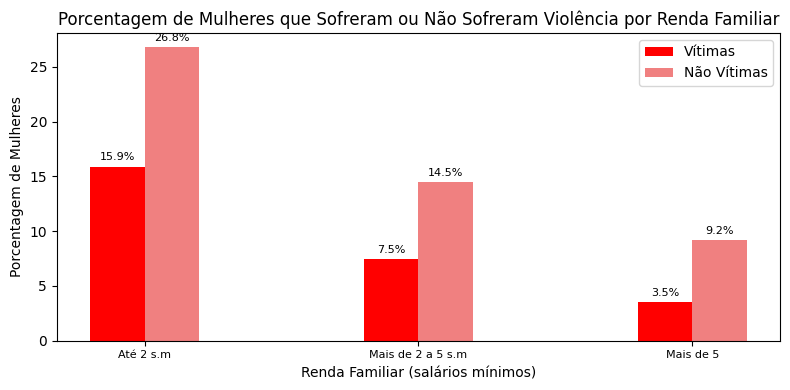

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Total de mulheres no dataset
total_mulheres = len(base_dados)

# Contagem de mulheres que sofreram violência por renda
contagem_vitimas_renda = base_dados[base_dados['P18_A'] == 1]['VD_RENDA'].value_counts().sort_index()

# Contagem de mulheres que não sofreram violência por renda
contagem_nao_vitimas_renda = base_dados[base_dados['P18_A'] == 2]['VD_RENDA'].value_counts().sort_index()

# Converter contagens em percentuais
percentuais_vitimas_renda = (contagem_vitimas_renda / total_mulheres) * 100
percentuais_nao_vitimas_renda = (contagem_nao_vitimas_renda / total_mulheres) * 100

# Rótulos para as categorias de renda
labels_renda = ['Até 2 s.m', 'Mais de 2 a 5 s.m', 'Mais de 5']

# Posição das barras no eixo x
x_renda = np.arange(len(labels_renda))

# Largura das barras
width_renda = 0.20

# Plot
fig_renda, ax_renda = plt.subplots(figsize=(8, 4))
rects1_renda = ax_renda.bar(x_renda, percentuais_vitimas_renda, width_renda, label='Vítimas', color='red')
rects2_renda = ax_renda.bar(x_renda + width_renda, percentuais_nao_vitimas_renda, width_renda, label='Não Vítimas', color='lightcoral')

# Adicionando rótulos, título e legenda
ax_renda.set_xlabel('Renda Familiar (salários mínimos)', fontsize=10)
ax_renda.set_ylabel('Porcentagem de Mulheres', fontsize=10)
ax_renda.set_title('Porcentagem de Mulheres que Sofreram ou Não Sofreram Violência por Renda Familiar', fontsize=12)
ax_renda.set_xticks(x_renda + width_renda / 2)
ax_renda.set_xticklabels(labels_renda, rotation=0, ha='center', fontsize=8)  # Rótulos retos
ax_renda.legend()

# Adicionando rótulos nas barras em porcentagem
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax_renda.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1_renda)
autolabel(rects2_renda)

plt.tight_layout()
plt.show()

Análise do modelo de regressão logística - Localizar variáveis que possam explicar a variável resposta.

* Variável resposta:
  * P18_A: Você já sofreu algum tipo de violência doméstica ou familiar?

In [ ]:
# Total de linhas no DataFrame
total_linhas = len(base_dados)

# Contar a quantidade de NaNs em cada coluna
nan_por_coluna = base_dados.isna().sum()

# Calcular a porcentagem de NaNs em cada coluna
percentual_nan_por_coluna = (nan_por_coluna / total_linhas) * 100

# Contar a quantidade de linhas com o código 97 em cada coluna
codigo_97_por_coluna = (base_dados == 97).sum()

# Calcular a porcentagem de linhas com o código 97 em cada coluna
percentual_codigo_97_por_coluna = (codigo_97_por_coluna / total_linhas) * 100

# Formatar a saída para mostrar as porcentagens com duas casas decimais
percentual_nan_por_coluna = percentual_nan_por_coluna.round(2)
percentual_codigo_97_por_coluna = percentual_codigo_97_por_coluna.round(2)

# Mostrar a porcentagem de NaNs por coluna
print("Percentual de NaNs por coluna:")
print(percentual_nan_por_coluna)

# Mostrar a porcentagem de linhas com o código 97 por coluna
print("\nPercentual de linhas com o código 97 por coluna:")
print(percentual_codigo_97_por_coluna)

# Selecionar colunas com menos de 20% de NaNs e menos de 20% de linhas com o código 97
colunas_validas = percentual_nan_por_coluna[(percentual_nan_por_coluna < 20) & (percentual_codigo_97_por_coluna < 20)].index

# Mostrar as colunas selecionadas
print("\nColunas com menos de 20% de NaNs e menos de 20% de linhas com o código 97:")
print(colunas_validas)

Percentual de NaNs por coluna:
ID                  0.0
P03                 0.0
P04                 0.0
P05                 0.0
P06                 0.0
                   ... 
POP_regiao_raca     0.0
POP_regiao_edu      0.0
POP_regiao_porte    0.0
W1                  0.0
W2                  0.0
Length: 103, dtype: float64

Percentual de linhas com o código 97 por coluna:
ID                  0.03
P03                 0.53
P04                 2.93
P05                 1.60
P06                 2.23
                    ... 
POP_regiao_raca     0.00
POP_regiao_edu      0.00
POP_regiao_porte    0.00
W1                  0.00
W2                  0.00
Length: 103, dtype: float64

Colunas com menos de 20% de NaNs e menos de 20% de linhas com o código 97:
Index(['ID', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08_1', 'P08_2', 'P08_3',
       'P08_4', 'P08_5', 'P08_6', 'P08_7', 'P08_8', 'P08_9', 'P08_10',
       'P08_11', 'P09', 'P10', 'P11', 'P12_01', 'P12_02', 'P12_03', 'P12_04',
       'P13', 'P15', 'P1

In [ ]:
# Remover linhas com NaN nas colunas selecionadas
base_dados_sem_nan = base_dados.dropna(subset=colunas_validas)

# Remover linhas com resposta 97 ou 99 nas colunas selecionadas
base_dados_limpo = base_dados_sem_nan[~base_dados_sem_nan[colunas_validas].isin([97, 99]).any(axis=1)]

# Exibir as primeiras linhas do DataFrame limpo
#base_dados_limpo = base_dados_limpo.loc[base_dados_limpo['VD_RENDA'] != 97]
base_dados_limpo

,ID,P03,P04,P05,P06,P07,P08_1,P08_2,P08_3,P08_4,...,VD_TRABALHO,VD_RENDA,VD_RELIGIAO,VD_PORTE,POP_regiao_idade,POP_regiao_raca,POP_regiao_edu,POP_regiao_porte,W1,W2
0,1,2,1,2,1,3,1,1,1,1,...,1,1,1,2,"1368769,64997537","3492870,23933838","1676030,32564476","1833026,92610785","0,182984706628559","4822,37879865543"
1,2,2,1,1,1,3,1,1,1,1,...,1,97,3,3,"2087753,60313513","9305147,46687386","3463850,5010793","2283455,46575742","0,426501513466645","7798,59256826784"
3,4,3,2,1,1,3,1,1,1,1,...,1,4,1,2,"4125873,7903102","5757238,40466733","3969200,1711912","7278733,22970919","0,580278168423321","12536,3215219058"
4,5,2,1,2,1,3,1,1,1,1,...,1,3,3,2,"1204952,8842969","4928294,52172805","2326739,31494048","2673532,83014303","0,179930621055583","5704,56980070413"
6,7,2,3,1,2,3,1,1,1,1,...,2,4,1,2,"2503964,45360618","9305147,46687386","1969237,01291137","5430154,404499","0,455385003963667","11963,7945216281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2993,2,1,1,1,3,2,1,2,1,...,1,3,3,3,"1224093,26675412","3492870,23933838","1861753,07705336","2636491,36329934","0,511487800484608","7254,27825860144"
2993,2994,3,1,1,1,3,2,2,2,1,...,1,3,3,3,"1368769,64997537","3492870,23933838","1892777,26538655","2636491,36329934","0,255743900242304","4936,43203888435"
2996,2997,3,5,2,1,4,2,2,2,2,...,2,3,1,1,"6626582,53147046","217603,89386544","7160066,96219253","9992811,49421768","0,247668454655575","5677,57489054775"
2997,2998,2,3,1,1,3,2,2,2,1,...,1,3,1,3,"1224093,26675412","2324293,07987146","1058552,96885554","2636491,36329934","0,767231700726912","13413,8534177151"


In [ ]:
# Etapa 1: Análise para entender a representação das variáveis na variável resposta

# Construção da tabela de contingência entre XXXX e P18_A
#tabela_contingencia = pd.crosstab([base_dados_limpo['VD_EDUCACAO'], base_dados_limpo['VD_RACA'],base_dados_limpo['VD_RENDA']], base_dados_limpo['P18_A'])
tabela_contingencia = pd.crosstab([base_dados_limpo['VD_EDUCACAO']], base_dados_limpo['P18_A'])
#tabela_contingencia = pd.crosstab([base_dados_limpo['VD_RENDA']], base_dados_limpo['P18_A'])
print(tabela_contingencia)


P18_A          1    2
VD_EDUCACAO          
1            134  203
2            166  287
3            198  424
4            242  532


In [ ]:
# Calcular a proporção de ocorrências "Sim" em relação ao total de ocorrências para cada estado
tabela_contingencia['Proporcao_Sim'] = tabela_contingencia[1] / (tabela_contingencia[1] + tabela_contingencia[2])

# Ordenar os estados pela proporção de ocorrências "Sim" em ordem decrescente
tabela_contingencia = tabela_contingencia.sort_values(by='Proporcao_Sim', ascending=False)

# Exibir os resultados
print(tabela_contingencia)

P18_A          1    2  Proporcao_Sim
VD_EDUCACAO                         
1            134  203       0.397626
2            166  287       0.366446
3            198  424       0.318328
4            242  532       0.312661


In [ ]:
# Calcular a proporção de ocorrências "Sim" em relação ao total de ocorrências para cada estado
tabela_contingencia['Proporcao_Sim'] = tabela_contingencia[1] / (tabela_contingencia[1] + tabela_contingencia[2])

# Ordenar os estados pela proporção de ocorrências "Sim" em ordem decrescente
tabela_contingencia = tabela_contingencia.sort_values(by='Proporcao_Sim', ascending=False)

# Exibir os resultados
print(tabela_contingencia)

P18_A          1    2  Proporcao_Sim
VD_EDUCACAO                         
1            134  203       0.397626
2            166  287       0.366446
3            198  424       0.318328
4            242  532       0.312661


In [ ]:
# Execute o teste qui-quadrado de independência
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia.iloc[:, :2])

# Exibir os resultados
print("Valor p:", p_valor)
print("Estatística qui-quadrado:", chi2)

Valor p: 0.016336477848749156
Estatística qui-quadrado: 10.279137549683991


Conclusão: A discrepância entre as frequências observadas e esperadas é moderada, indicando uma possível associação entre as variáveis.
Significância Estatística: Com um valor p de 0.016, essa associação é estatisticamente significativa ao nível de 0.05.

Aplicando análises para encontrar as variáveis mais importantes

In [ ]:
# Lista das colunas desejadas
#colunas_desejadas = ['VD_IDADE','VD_RACA','VD_REGIAO','VD_EDUCACAO','P38']
#colunas_desejadas = ['VD_RACA','P30_01', 'P30_02', 'P30_03', 'P30_04',
#       'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09', 'P30_10', 'P30_11',
#       'P30_12','P18_A']

#colunas_desejadas = ['P30_01', 'P30_02', 'P30_03', 'P30_04', 'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09', 'P30_10',
#                  'P30_11', 'P30_12', 'P36', 'P38', 'P39', 'P40', 'P41', 'V15', 'VD_REGIAO', 'VD_IDADE', 'VD_RACA', 'VD_EDUCACAO',
#                  'VD_OCUPACAO', 'VD_TRABALHO', 'VD_RENDA', 'VD_RELIGIAO','P18_A']

#colunas_desejadas = ['P08_1','P30_01', 'P30_02', 'P30_03', 'P30_04', 'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09', 'P30_10','P41',
#                     'P30_11', 'P30_12','P38','P18_A','VD_IDADE','VD_EDUCACAO','VD_OCUPACAO','V15','VD_RELIGIAO','P36','P40']

#colunas_desejadas = ['P08_1','P30_01', 'P30_02', 'P30_03', 'P30_04', 'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09', 'P30_10','P41',
#                     'P30_11', 'P30_12','P38','P18_A','VD_IDADE','VD_EDUCACAO','VD_OCUPACAO','V15','VD_RELIGIAO','P36','P40']

colunas_desejadas = ['P30_03 ', 'P30_04', 'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09', 'P30_10','P41','P38','P18_A',
                     'VD_IDADE','VD_EDUCACAO','VD_OCUPACAO','V15','VD_RELIGIAO','P36','P40']

# Filtrar o DataFrame para incluir apenas as colunas desejadas
data_frame_teste = base_dados_limpo[colunas_desejadas]

# Converter todas as colunas de float para int
data_frame_teste = data_frame_teste.astype(int)
data_frame_teste

,P30_03,P30_04,P30_05,P30_06,P30_07,P30_08,P30_09,P30_10,P41,P38,P18_A,VD_IDADE,VD_EDUCACAO,VD_OCUPACAO,V15,VD_RELIGIAO,P36,P40
0,2,2,2,2,2,2,2,2,1,1,2,2,1,1,2,1,3,2
1,2,2,2,2,2,2,2,2,1,1,2,3,3,1,4,3,3,1
3,1,2,2,2,1,2,2,2,1,1,1,3,4,1,1,1,3,2
4,2,2,2,2,2,2,2,2,1,1,2,3,3,1,4,3,3,2
6,2,2,2,2,2,2,2,2,1,2,1,2,2,2,4,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2,2,2,2,2,2,2,2,1,1,1,3,4,1,2,3,3,3
2993,2,2,2,2,2,2,2,2,1,1,2,2,3,1,4,3,3,6
2996,2,2,2,2,1,2,2,2,1,2,2,1,3,2,4,1,2,1
2997,2,2,2,2,2,2,2,2,1,1,2,3,2,1,4,1,3,6


In [ ]:
# Lista das colunas para criar variáveis dummy
cols_dummy = ['VD_EDUCACAO','VD_OCUPACAO','V15','VD_RELIGIAO','P36','P40']

# Criar variáveis dummy
dummies = pd.get_dummies(data_frame_teste, columns=cols_dummy, drop_first=True)

# Substituir False por 0 e True por 1
dummies = dummies.replace({False: 0, True: 1})

# Exibir as primeiras linhas do DataFrame com as variáveis dummy
print(dummies.head())
# Imprimir os nomes das colunas
print(dummies.columns)

   P30_03  P30_04  P30_05  P30_06  P30_07  P30_08  P30_09  P30_10  P41  P38  \
0       2       2       2       2       2       2       2       2    1    1   
1       2       2       2       2       2       2       2       2    1    1   
3       1       2       2       2       1       2       2       2    1    1   
4       2       2       2       2       2       2       2       2    1    1   
6       2       2       2       2       2       2       2       2    1    2   

   ...  V15_4  VD_RELIGIAO_2  VD_RELIGIAO_3  P36_2  P36_3  P40_2  P40_3  \
0  ...      0              0              0      0      1      1      0   
1  ...      1              0              1      0      1      0      0   
3  ...      0              0              0      0      1      1      0   
4  ...      1              0              1      0      1      1      0   
6  ...      1              0              0      1      0      0      0   

   P40_4  P40_5  P40_6  
0      0      0      0  
1      0      0      0  

In [ ]:
# Lista das colunas que devem ser alteradas
colunas_para_alterar = ['P30_03', 'P30_04', 'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09','P30_10', 'P41', 'P38', 'P18_A']

# Aplica a substituição apenas nas colunas desejadas
dummies[colunas_para_alterar] = dummies[colunas_para_alterar].replace(2, 0)
#data_frame_teste[colunas_para_alterar] = data_frame_teste[colunas_para_alterar].replace(2, 0)

dummies
#data_frame_teste

,P30_03,P30_04,P30_05,P30_06,P30_07,P30_08,P30_09,P30_10,P41,P38,...,V15_4,VD_RELIGIAO_2,VD_RELIGIAO_3,P36_2,P36_3,P40_2,P40_3,P40_4,P40_5,P40_6
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,1,1,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
2993,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
2996,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
def stepwise_logistic_regression(X, y,
                                 initial_list=[],
                                 threshold_in=0.01,
                                 threshold_out=0.05,
                                 verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Adicionando variável: {} com p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Removendo variável: {} com p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X = dummies.drop(columns=['P18_A'])  # Variáveis preditoras - tira tipo que é a resposta e est_civ que virou dummy
y = dummies['P18_A']  # Variável resposta

selected_features = stepwise_logistic_regression(X, y)

print('Variáveis selecionadas:')
print(selected_features)

Adicionando variável: P30_07 com p-value 1.73253e-40
Adicionando variável: P30_03 com p-value 6.79333e-12
Adicionando variável: P41 com p-value 3.49286e-10
Adicionando variável: P40_2 com p-value 1.44156e-08
Adicionando variável: VD_RELIGIAO_2 com p-value 0.000196821
Adicionando variável: VD_RELIGIAO_3 com p-value 3.6208e-06
Adicionando variável: VD_OCUPACAO_3 com p-value 0.00596073
Adicionando variável: V15_4 com p-value 0.00619043
Adicionando variável: P36_3 com p-value 0.00825286
Adicionando variável: P30_08 com p-value 0.00840802
Variáveis selecionadas:
['P30_07', 'P30_03', 'P41', 'P40_2', 'VD_RELIGIAO_2', 'VD_RELIGIAO_3', 'VD_OCUPACAO_3', 'V15_4', 'P36_3', 'P30_08']


In [ ]:
# Lista das colunas para a fórmula
colunas = ['P30_07', 'P30_03', 'P41', 'P40_2', 'VD_RELIGIAO_2', 'VD_RELIGIAO_3', 'VD_OCUPACAO_3', 'V15_4', 'P36_3', 'P30_08']

# Concatenar os nomes das colunas com '+'
formula = 'P18_A ~ ' + '+'.join(colunas)

# Exibir a fórmula
print(formula)

P18_A ~ P30_07+P30_03+P41+P40_2+VD_RELIGIAO_2+VD_RELIGIAO_3+VD_OCUPACAO_3+V15_4+P36_3+P30_08


In [ ]:
print(X)
print(y)

      P30_01  P30_02  P30_03  P30_04  P30_05  P30_06  P30_07  P30_08  P30_09  \
0          0       0       0       0       0       0       0       0       0   
1          1       0       0       0       0       0       0       0       0   
3          1       0       1       0       0       0       1       0       0   
4          0       0       0       0       0       0       0       0       0   
6          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2992       0       0       0       0       0       0       0       0       0   
2993       0       0       0       0       0       0       0       0       0   
2996       0       0       0       0       0       0       1       0       0   
2997       0       0       0       0       0       0       0       0       0   
2999       1       1       1       0       0       0       1       0       0   

      P30_10  P30_11  P30_12  P38  VD_I

In [ ]:
#Modelo de Regressão Logística pós Stepwise - somente as variáveis listadas acima
from statsmodels.formula.api import logit
modelo=logit(formula, data=dummies).fit()

Optimization terminated successfully.
         Current function value: 0.552783
         Iterations 6


In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  P18_A   No. Observations:                 2186
Model:                          Logit   Df Residuals:                     2175
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1363
Time:                        01:43:40   Log-Likelihood:                -1208.4
converged:                       True   LL-Null:                       -1399.1
Covariance Type:            nonrobust   LLR p-value:                 8.035e-76
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5819      0.150    -10.518      0.000      -1.877      -1.287
P30_07            1.1750      0.165      7.116      0.000       0.851       1.499
P30_03            0.8485      0.155      5.458      0.000       0.544       1.153
P41               0.9767      0.125      7.783      0.000       0.731       1.223
P40_2            -0.5952      0.112     -5.322      0.000      -0.814      -0.376
VD_RELIGIAO_2     0.5608      0.114      4.899      0.000       0.336       0.785
VD_RELIGIAO_3     0.5588      0.132      4.236      0.000       0.300       0.817
VD_OCUPACAO_3    -0.3681      0.122     -3.005      0.003      -0.608      -0.128
V15_4            -0.2697      0.101     -2.675      0.007      -0.467      -0.072
P36_3            -0.2747      0.103     -2.661      0.008      -0.477      -0.072
P30_08            0.4609      0.175      2.635      0.008       0.118       0.804
=================================================================================
"""

In [ ]:
#Importa ferramentas para análise do modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

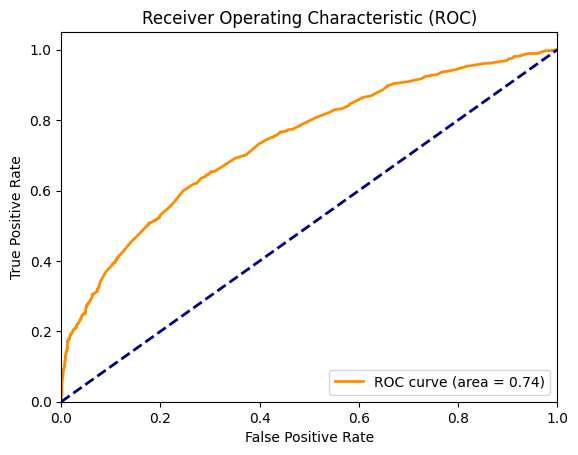

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from statsmodels.tools import add_constant

# Adicione uma constante ao DataFrame X
X_constant = add_constant(X[selected_features])

# Calcula as probabilidades previstas
y_pred_prob = modelo.predict(X_constant)

# Calcula o FPR (Taxa de Falsos Positivos) e TPR (Taxa de Verdadeiros Positivos)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# Calcula a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Curva ROC
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from scipy.stats import chi2

# Calcula a estatística do teste de Hosmer-Lemeshow
hosmer_lemeshow_statistic = np.sum((y_pred_prob - y_pred_prob.mean())**2)

# Define o número de grupos (bins) para o teste de Hosmer-Lemeshow
num_groups = 10

# Calcula os graus de liberdade
df = num_groups - 2

# Calcula o valor-p comparando a estatística do teste com a distribuição qui-quadrado
p_value = 1 - chi2.cdf(hosmer_lemeshow_statistic, df)

# Exibe o valor-p com três casas decimais
print("Valor-p do teste de Hosmer-Lemeshow: {:.3f}".format(p_value))

Valor-p do teste de Hosmer-Lemeshow: 0.000


In [ ]:
# Matriz de Confusão
y_pred = (y_pred_prob > 0.5).astype(int)
conf_matrix = confusion_matrix(y, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[1336  110]
 [ 500  240]]


In [ ]:
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)

# Calcula o total de observações
total_observations = np.sum(conf_matrix)

# Calcula o total de acertos (soma da diagonal principal)
total_acertos = np.trace(conf_matrix)

# Calcula o total de erros (subtrai o total de acertos do total de observações)
total_erros = total_observations - total_acertos

# Calcula a porcentagem de acertos e erros
percent_acertos = (total_acertos / total_observations) * 100
percent_erros = (total_erros / total_observations) * 100

# Exibe os resultados
print("Total de acertos:", total_acertos)
print("Total de erros:", total_erros)
print("Porcentagem de acertos: {:.2f}%".format(percent_acertos))
print("Porcentagem de erros: {:.2f}%".format(percent_erros))

Total de acertos: 1576
Total de erros: 610
Porcentagem de acertos: 72.10%
Porcentagem de erros: 27.90%


In [ ]:
# Calcula a estatística de Cox e Snell
llf_null = -modelo.llnull
llf_modelo = modelo.llf
n = len(y)
cox_snell_statistic = 1 - np.exp((2/n) * (llf_null - llf_modelo))

# Exibe a estatística de Cox e Snell
print("Estatística de Cox e Snell:", cox_snell_statistic)

Estatística de Cox e Snell: -9.86624639871951


In [ ]:
# Calcula a função de verossimilhança do modelo nulo (sem preditores)
llf_null = modelo.llnull

# Calcula a função de verossimilhança do modelo ajustado
llf_modelo = modelo.llf

# Calcula o número total de observações
n = len(y)

# Calcula a estatística de Nagelkerke
R2_nagelkerke = 1 - (np.exp(-2 * (llf_null - llf_modelo) / n) / (1 - np.exp(llf_modelo * 2 / n)))

# Exibe a estatística de Nagelkerke
print("Estatística de Nagelkerke:", R2_nagelkerke)

Estatística de Nagelkerke: -0.7798599438456166


In [ ]:
# Selecionar variáveis preditoras (X) e variável dependente (y)
X = dummies.drop(columns=['P18_A'])  # Variáveis preditoras
y = dummies['P18_A']  # Variável resposta

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", report)

Acurácia: 0.7088414634146342
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       427
           1       0.67      0.33      0.44       229

    accuracy                           0.71       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.70      0.71      0.68       656



In [ ]:
# Agrupar os dados pela coluna 'categoria' e contar a incidência de cada categoria
incidencia = base_dados.groupby('P18_A').size().reset_index(name='contagem')

# Exibir a tabela dinâmica resultante
print(incidencia)

   P18_A  contagem
0      1       986
1      2      2004
2     97        10


In [ ]:
# Imprimir os nomes das colunas
print(dummies.columns)

Index(['P30_03', 'P30_04', 'P30_05', 'P30_06', 'P30_07', 'P30_08', 'P30_09',
       'P30_10', 'P41', 'P38', 'P18_A', 'VD_IDADE', 'VD_EDUCACAO_2',
       'VD_EDUCACAO_3', 'VD_EDUCACAO_4', 'VD_OCUPACAO_2', 'VD_OCUPACAO_3',
       'V15_2', 'V15_3', 'V15_4', 'VD_RELIGIAO_2', 'VD_RELIGIAO_3', 'P36_2',
       'P36_3', 'P40_2', 'P40_3', 'P40_4', 'P40_5', 'P40_6'],
      dtype='object')
